In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv('EW_MAX.csv')

In [156]:
df.head(3)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,3/27/2000,3.8125,4.15625,3.812500,4.125000,4.125000,3675600
1,3/28/2000,4.1250,4.12500,4.000000,4.015625,4.015625,1077600
2,3/29/2000,4.0000,4.03125,3.953125,4.000000,4.000000,437200


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [160]:
pd.isnull(df).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [162]:
sorted_df = df.sort_values('Volume', ascending = True).head()
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
1425,11/25/2005,10.275000,10.352500,10.260000,10.32500,10.32500,190400
104,8/23/2000,5.718750,5.734375,5.640625,5.71875,5.71875,220000
93,8/8/2000,5.671875,5.687500,5.500000,5.62500,5.62500,224000
923,11/28/2003,7.500000,7.582500,7.477500,7.53000,7.53000,224800
1926,11/23/2007,12.282500,12.462500,12.257500,12.42250,12.42250,225600


In [164]:
sorted_df = df.sort_values('High', ascending = True).head()
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
153,11/1/2000,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
154,11/2/2000,3.296875,3.562500,3.265625,3.546875,3.546875,3819600
7,4/5/2000,3.468750,3.562500,3.453125,3.484375,3.484375,6349600
166,11/20/2000,3.578125,3.578125,3.390625,3.437500,3.437500,530800
6,4/4/2000,3.531250,3.578125,3.093750,3.500000,3.500000,13136800


In [166]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4392.0,3.056254e+01,2.991476e+01,3.296875,8.718125e+00,1.476625e+01,4.254625e+01,1.210800e+02
High,4392.0,3.089362e+01,3.021097e+01,3.390625,8.803125e+00,1.498125e+01,4.305125e+01,1.217500e+02
Low,4392.0,3.023883e+01,2.961576e+01,3.000000,8.625000e+00,1.466250e+01,4.208625e+01,1.201700e+02
Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Adj_Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Volume,4392.0,1.884027e+06,1.621609e+06,190400.000000,1.088800e+06,1.539300e+06,2.188900e+06,4.641260e+07


In [168]:
most_volume = df.query('Volume>1500000', inplace = False).sort_values('Volume', ascending = False)
most_volume[:10]

,Date,Open,High,Low,Close,Adj_Close,Volume
2770,3/31/2011,44.005001,44.095001,43.360001,43.500000,43.500000,46412600
2103,8/7/2008,14.082500,14.547500,13.437500,14.460000,14.460000,23767600
3288,4/24/2013,33.275002,33.299999,31.750000,32.299999,32.299999,22986800
153,11/1/2000,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
152,10/31/2000,3.812500,4.000000,3.343750,3.359375,3.359375,17944400
3155,10/9/2012,44.779999,44.794998,42.285000,42.299999,42.299999,17734800
833,7/23/2003,8.000000,8.000000,6.675000,6.875000,6.875000,16833200
4173,10/26/2016,99.300003,100.860001,94.250000,94.250000,94.250000,16796600
3533,4/14/2014,40.965000,42.200001,40.365002,40.500000,40.500000,14450200
9,4/7/2000,3.593750,3.812500,3.593750,3.609375,3.609375,13904800


In [170]:
df[["High"]].iloc[18]

High    3.6875
Name: 18, dtype: float64

In [172]:
df[["Low"]].iloc[10]

Low    3.625
Name: 10, dtype: float64

<Figure size 1000x600 with 0 Axes>

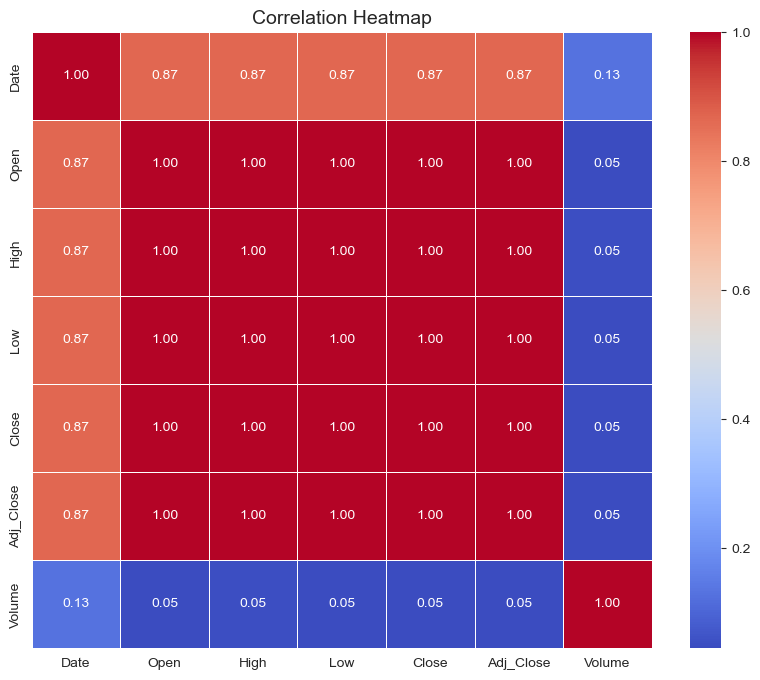

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Date"] = pd.to_datetime(df["Date"])

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


C:\Users\Fahad\AppData\Local\Temp\ipykernel_1044\3489652106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.High)


<Axes: xlabel='High', ylabel='Density'>

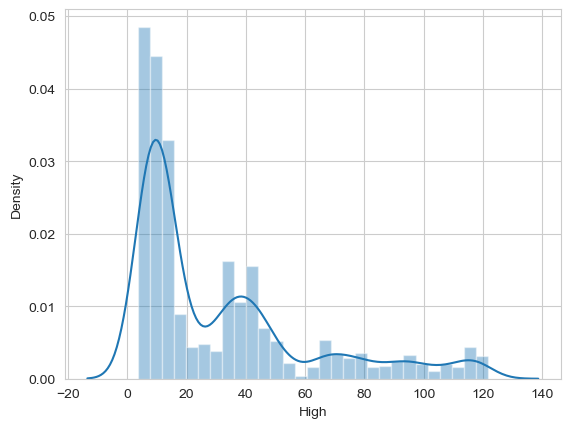

In [178]:
sns.distplot(df.High)

<Axes: ylabel='Low'>

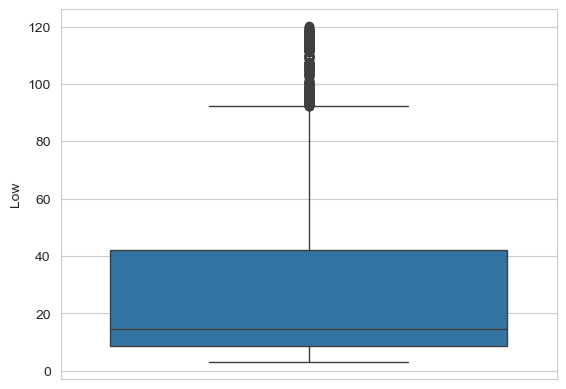

In [180]:
sns.boxplot(df.Low)

<Axes: ylabel='Volume'>

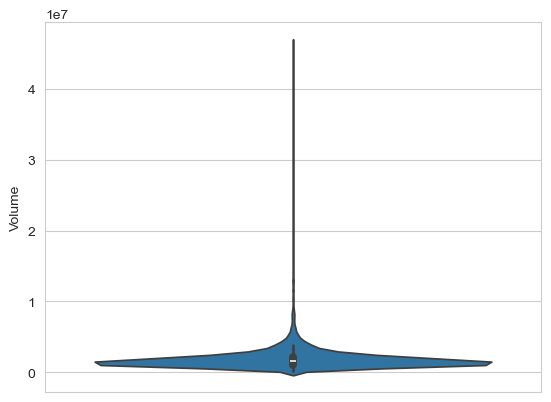

In [182]:
sns.violinplot(df.Volume)

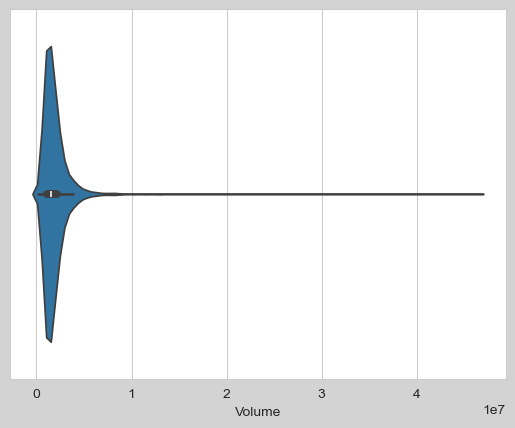

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
df1 = pd.DataFrame({
    'Volume': [10, 15, 10, 12, 18, 20, 19, 25, 20, 30]
})

sns.violinplot(data=df, x="Volume")
plt.gcf().set_facecolor('lightgray')  
plt.show()

In [186]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


[Text(0.5, 1.0, 'High vs Volume')]

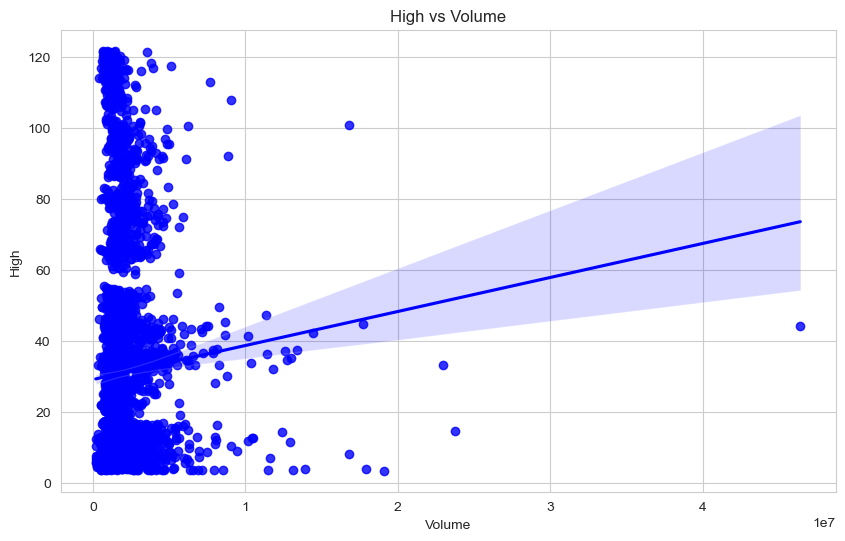

In [188]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, y = "High", x ="Volume", color = "b").set(title = "High vs Volume")

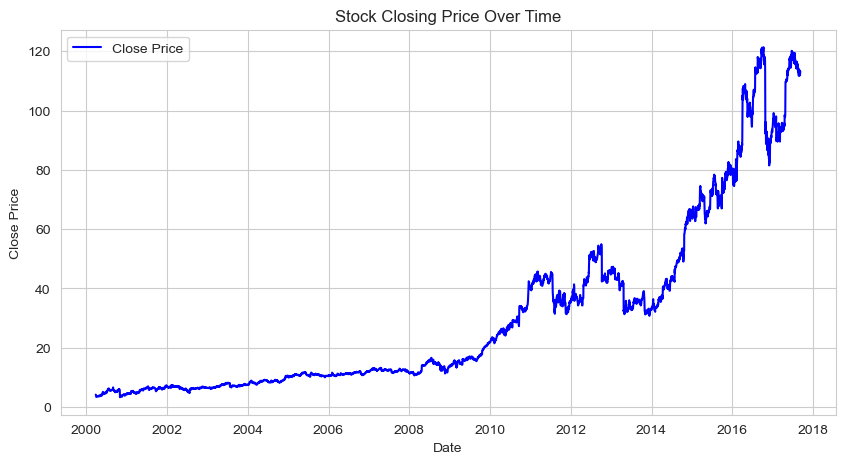

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Close"], color="blue", label="Close Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


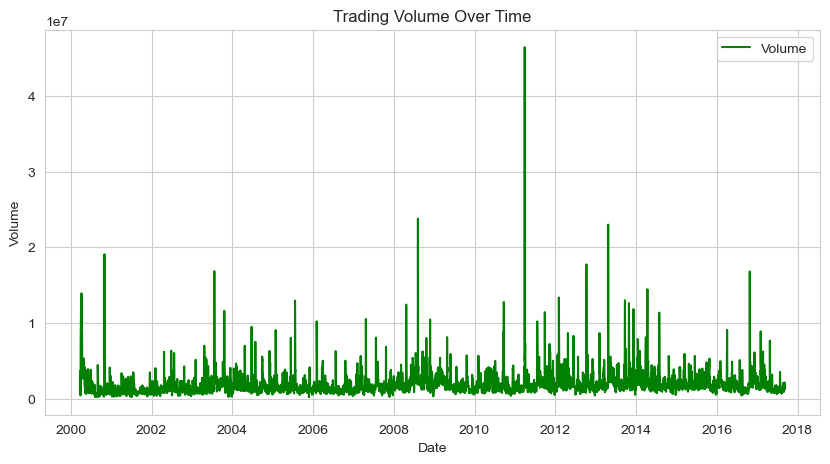

In [192]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Volume"], color="green", label="Volume")
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


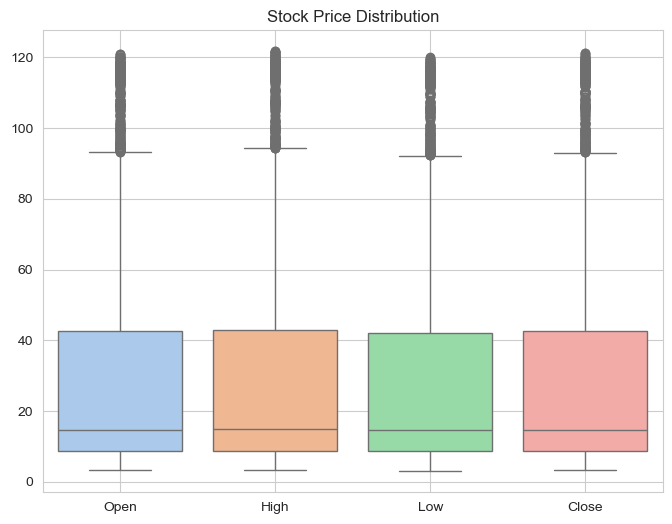

In [194]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["Open", "High", "Low", "Close"]], palette="pastel")
plt.title("Stock Price Distribution")
plt.grid(True)
plt.show()


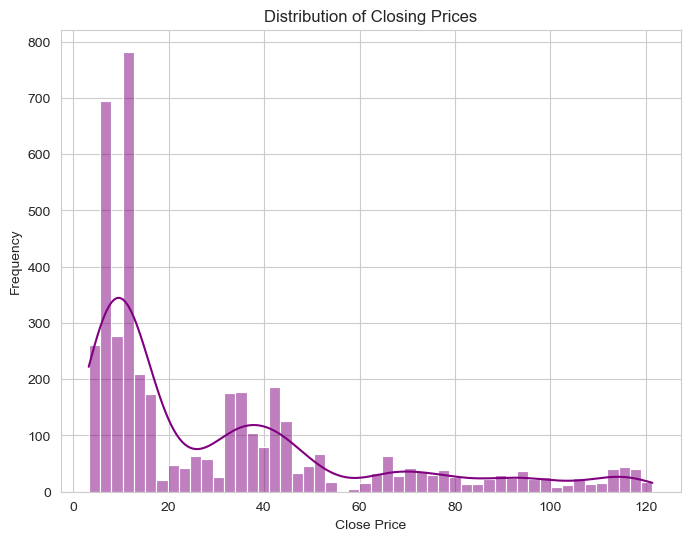

In [196]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Close"], bins=50, kde=True, color="purple")
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


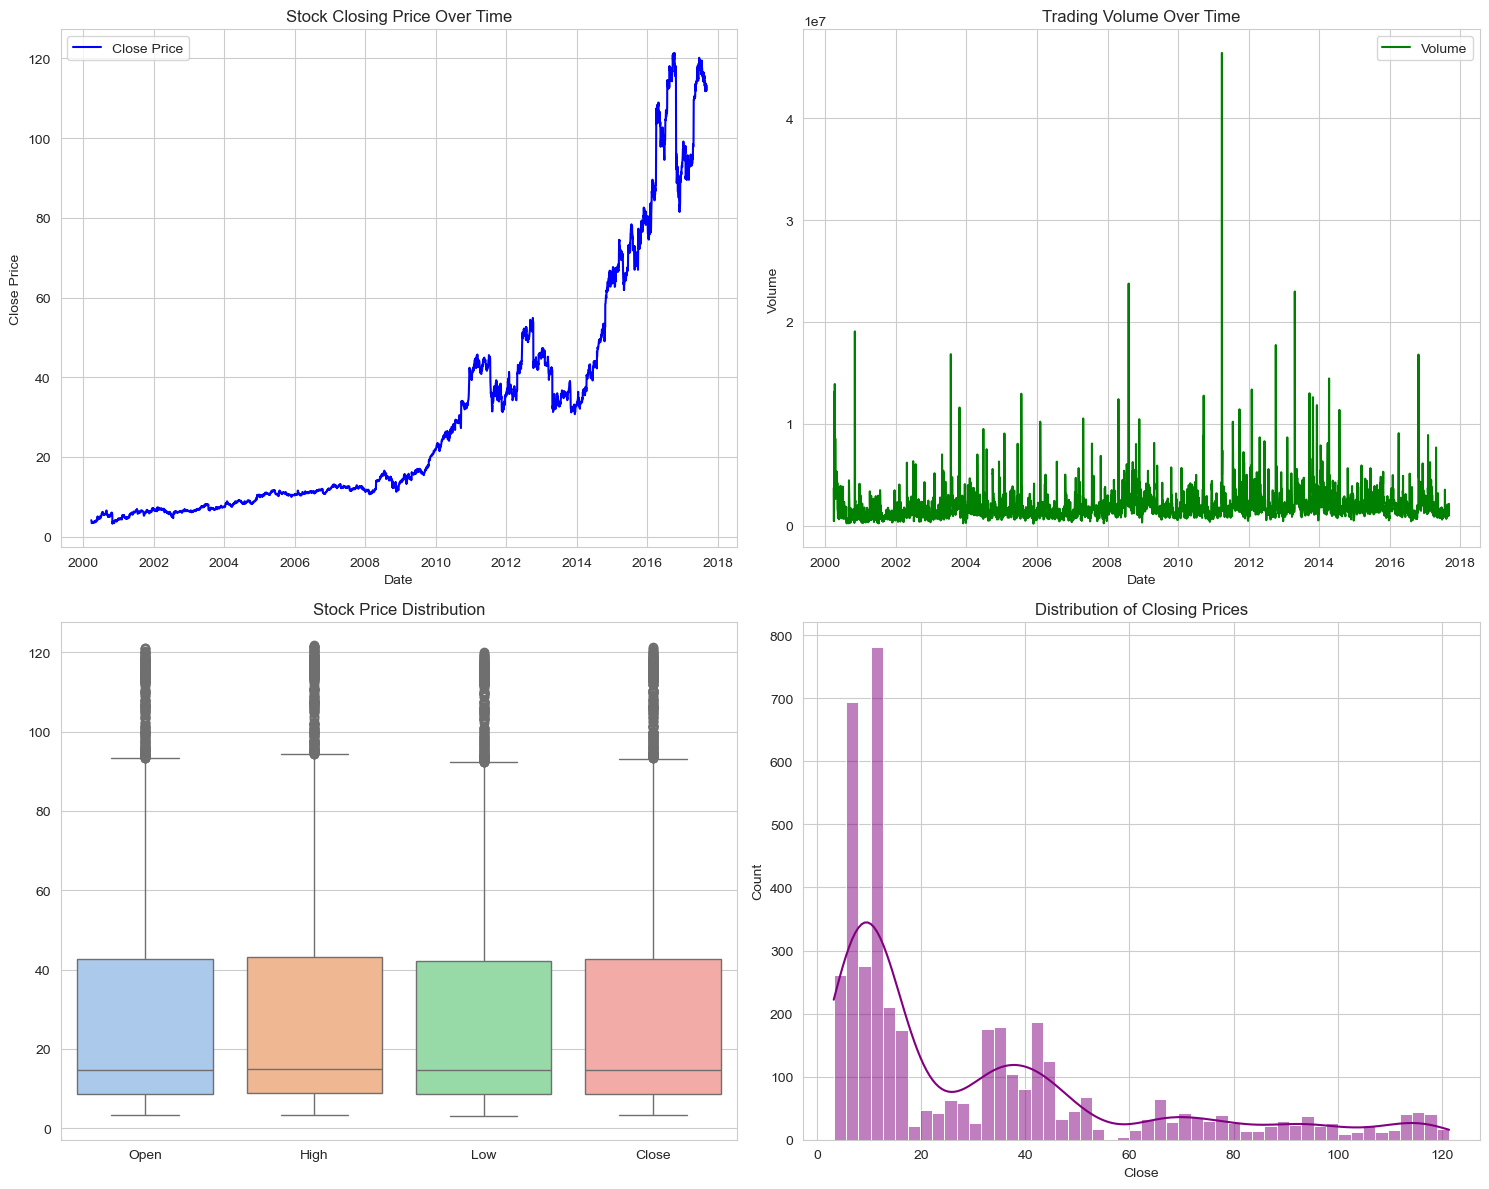

In [198]:
# Create subplots for multiple charts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Stock Price Trends Over Time
axes[0, 0].plot(df["Date"], df["Close"], color="blue", label="Close Price")
axes[0, 0].set_title("Stock Closing Price Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Close Price")
axes[0, 0].legend()

# 2. Volume Trends Over Time
axes[0, 1].plot(df["Date"], df["Volume"], color="green", label="Volume")
axes[0, 1].set_title("Trading Volume Over Time")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Volume")
axes[0, 1].legend()

# 3. Box Plot to Identify Outliers
sns.boxplot(data=df[["Open", "High", "Low", "Close"]], ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Stock Price Distribution")

# 4. Histogram of Stock Prices
sns.histplot(df["Close"], bins=50, kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Closing Prices")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
''''
df_candle = df.set_index("Date")[["Open", "High", "Low", "Close", "Volume"]]
plt.figure(figsize=(12, 6))
mpf.plot(df_candle.tail(100), type="candle", style="charles", volume=True, 
         title="Candlestick Chart (Last 100 Days)")
''''

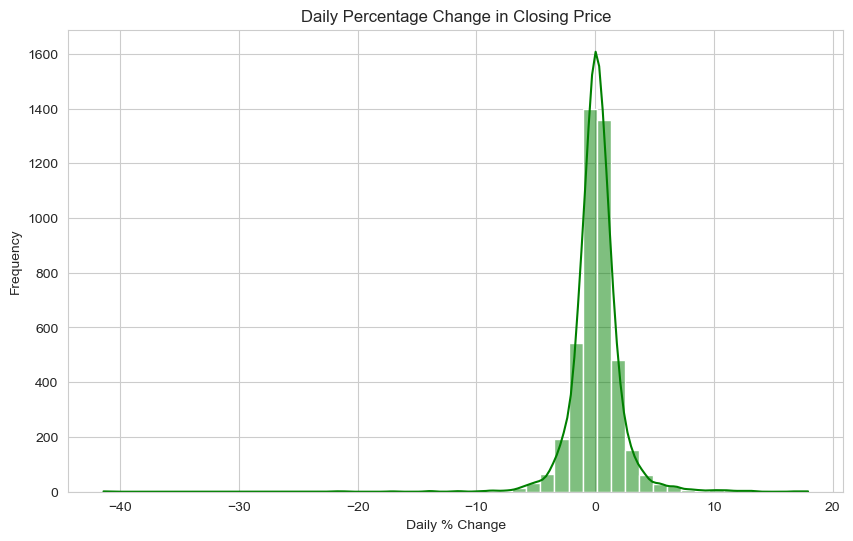

In [200]:
df["Daily Change"] = df["Close"].pct_change() * 100  # Convert to percentage
plt.figure(figsize=(10, 6))
sns.histplot(df["Daily Change"].dropna(), bins=50, kde=True, color="green")
plt.title("Daily Percentage Change in Closing Price")
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

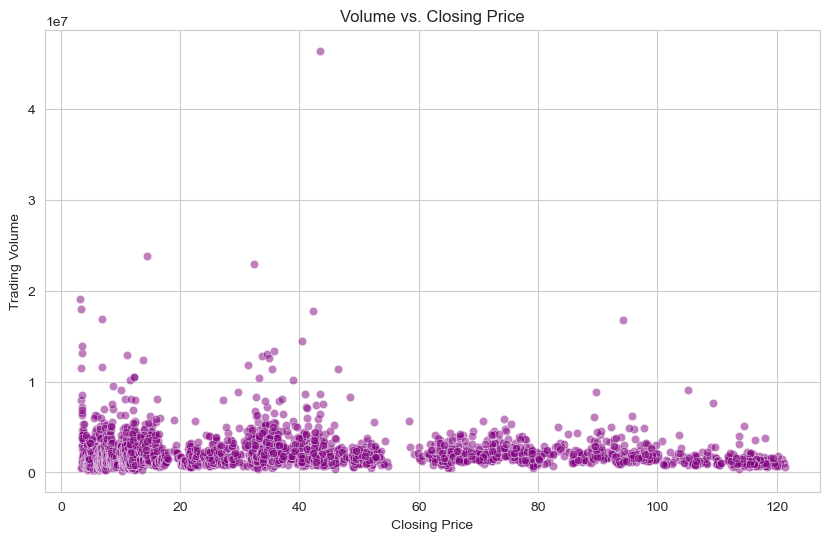

In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Close"], y=df["Volume"], alpha=0.5, color="purple")
plt.title("Volume vs. Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("Trading Volume")
plt.grid(True)
plt.show()

In [217]:
plt.figure(figsize=(12, 6))
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

plt.plot(df["Date"], df["Close"], label="Close Price", color="blue", alpha=0.6)
plt.plot(df["Date"], df["MA50"], label="50-Day MA", color="orange", linewidth=2)
plt.plot(df["Date"], df["MA200"], label="200-Day MA", color="red", linewidth=2)
plt.title("Stock Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Close'

<Figure size 1200x600 with 0 Axes>

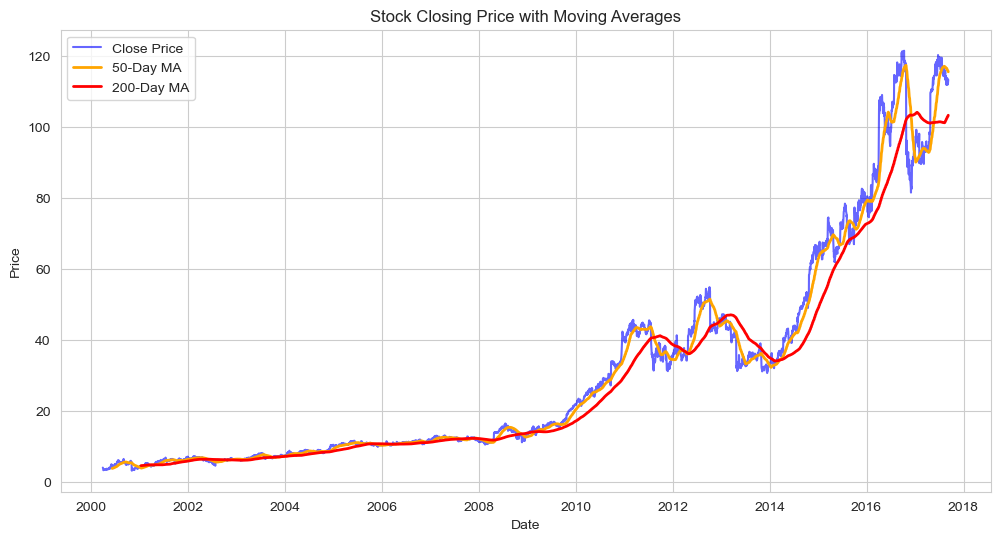

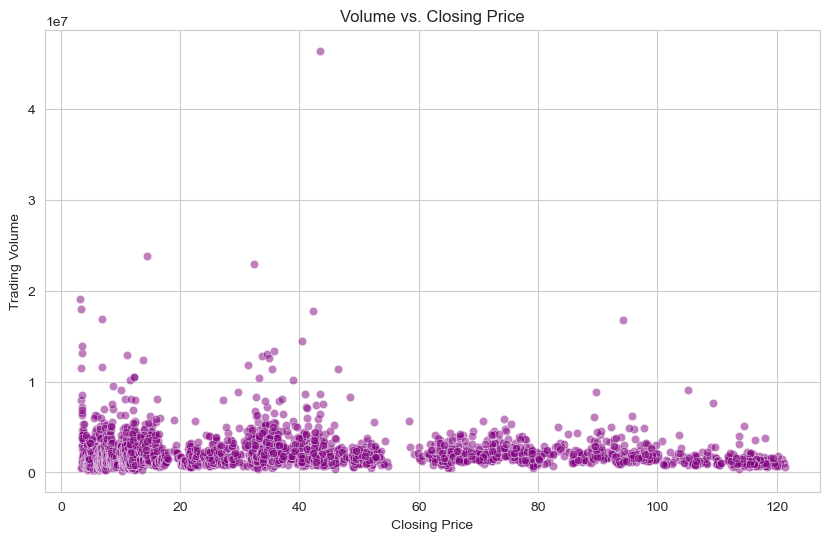

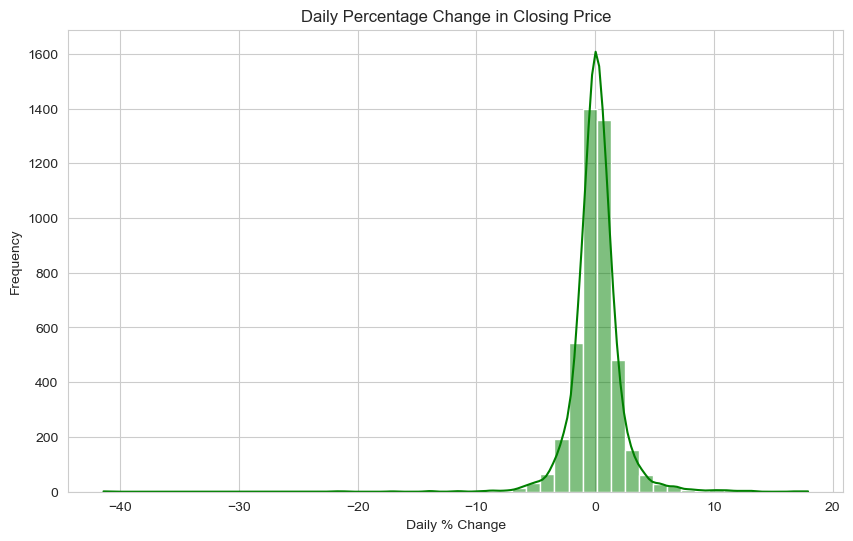

In [206]:

import numpy as np

# 1. Moving Average Chart (50-day & 200-day)
plt.figure(figsize=(12, 6))
df["MA50"] = df["Close"].rolling(window=50).mean()
df["MA200"] = df["Close"].rolling(window=200).mean()

plt.plot(df["Date"], df["Close"], label="Close Price", color="blue", alpha=0.6)
plt.plot(df["Date"], df["MA50"], label="50-Day MA", color="orange", linewidth=2)
plt.plot(df["Date"], df["MA200"], label="200-Day MA", color="red", linewidth=2)
plt.title("Stock Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# 3. Volume vs. Closing Price Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Close"], y=df["Volume"], alpha=0.5, color="purple")
plt.title("Volume vs. Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("Trading Volume")
plt.grid(True)
plt.show()

# 4. Daily Price Change Histogram
df["Daily Change"] = df["Close"].pct_change() * 100  # Convert to percentage
plt.figure(figsize=(10, 6))
sns.histplot(df["Daily Change"].dropna(), bins=50, kde=True, color="green")
plt.title("Daily Percentage Change in Closing Price")
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\Fahad\AppData\Local\Temp\ipykernel_1044\608745243.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axes[0, 0], data=df, x='Category', y='Value', palette="Set2")
C:\Users\Fahad\AppData\Local\Temp\ipykernel_1044\608745243.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], data=df, x='Category', y='Value', palette="coolwarm")


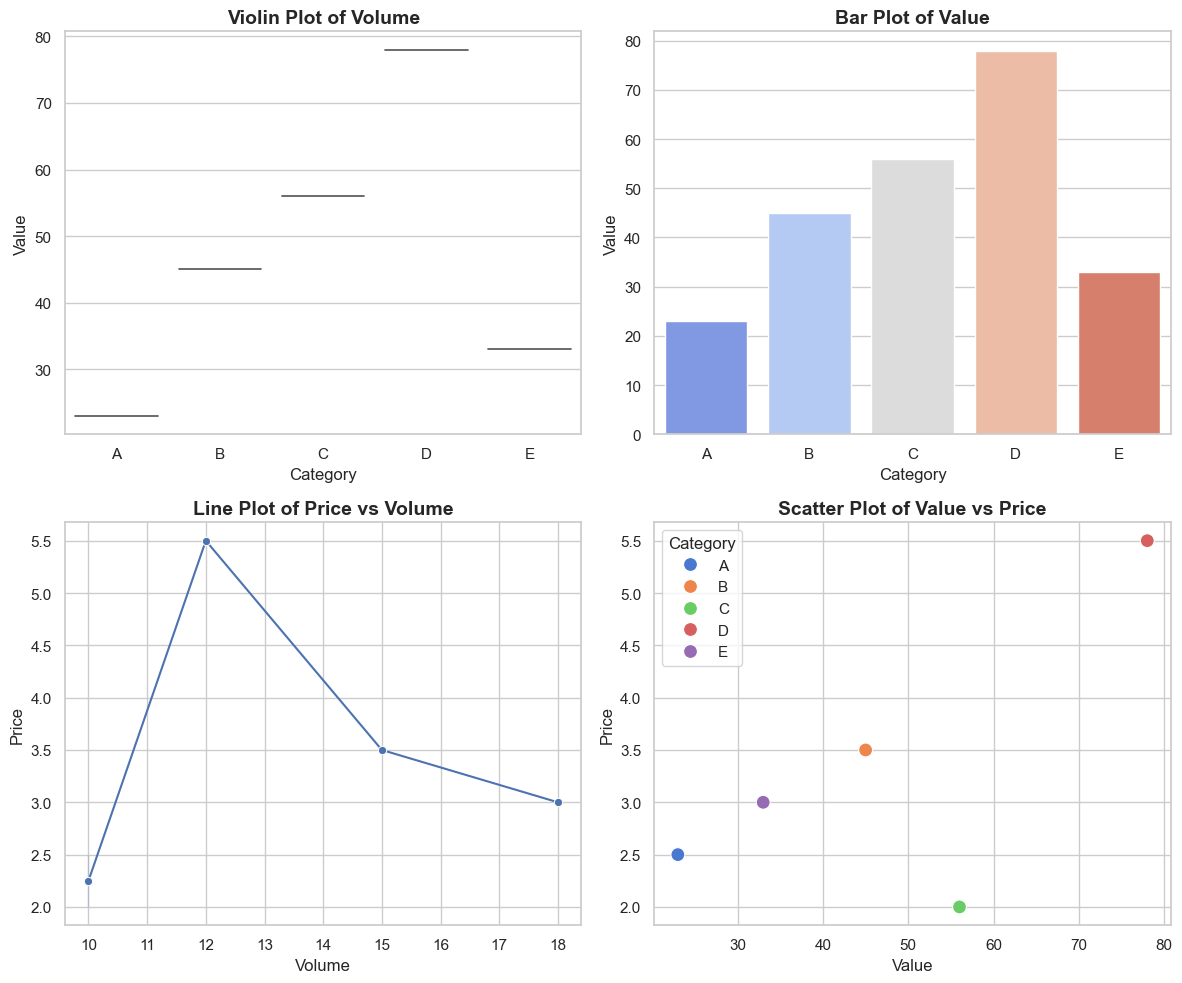

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value': [23, 45, 56, 78, 33],
    'Volume': [10, 15, 10, 12, 18],
    'Price': [2.5, 3.5, 2.0, 5.5, 3.0]
})

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and set of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Violin plot for 'Volume'
sns.violinplot(ax=axes[0, 0], data=df, x='Category', y='Value', palette="Set2")
axes[0, 0].set_title("Violin Plot of Volume", fontsize=14, fontweight='bold')

# Bar plot for 'Value'
sns.barplot(ax=axes[0, 1], data=df, x='Category', y='Value', palette="coolwarm")
axes[0, 1].set_title("Bar Plot of Value", fontsize=14, fontweight='bold')

# Line plot for 'Price' over 'Volume'
sns.lineplot(ax=axes[1, 0], data=df, x='Volume', y='Price', marker='o', color='b')
axes[1, 0].set_title("Line Plot of Price vs Volume", fontsize=14, fontweight='bold')

# Scatter plot for 'Value' vs 'Price'
sns.scatterplot(ax=axes[1, 1], data=df, x='Value', y='Price', hue='Category', palette="muted", s=100)
axes[1, 1].set_title("Scatter Plot of Value vs Price", fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()